# 📘 Customer Segmentation using K-Means Clustering

Import Required Libraries 

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
plt.style.use('default')
sns.set_palette("husl")

Load and explore The Dataset

In [9]:
df = pd.read_csv('C:\Data Science(ML)\Mall_Customers.csv')

In [18]:
df.shape

(200, 5)

In [30]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [24]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


Check For Missing Values

In [33]:
print(df.isnull().sum())

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


Data cleaning and Preprocessing 

In [11]:
#encode the categorical "Gender" column
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])

In [44]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [13]:
#select relevent features
scaler = StandardScaler()
features = df[['Age','Annual Income (k$)','Spending Score (1-100)']]
X_scaled = scaler.fit_transform(features)
X_scaled[:5]

array([[-1.42456879, -1.73899919, -0.43480148],
       [-1.28103541, -1.73899919,  1.19570407],
       [-1.3528021 , -1.70082976, -1.71591298],
       [-1.13750203, -1.70082976,  1.04041783],
       [-0.56336851, -1.66266033, -0.39597992]])

EDA

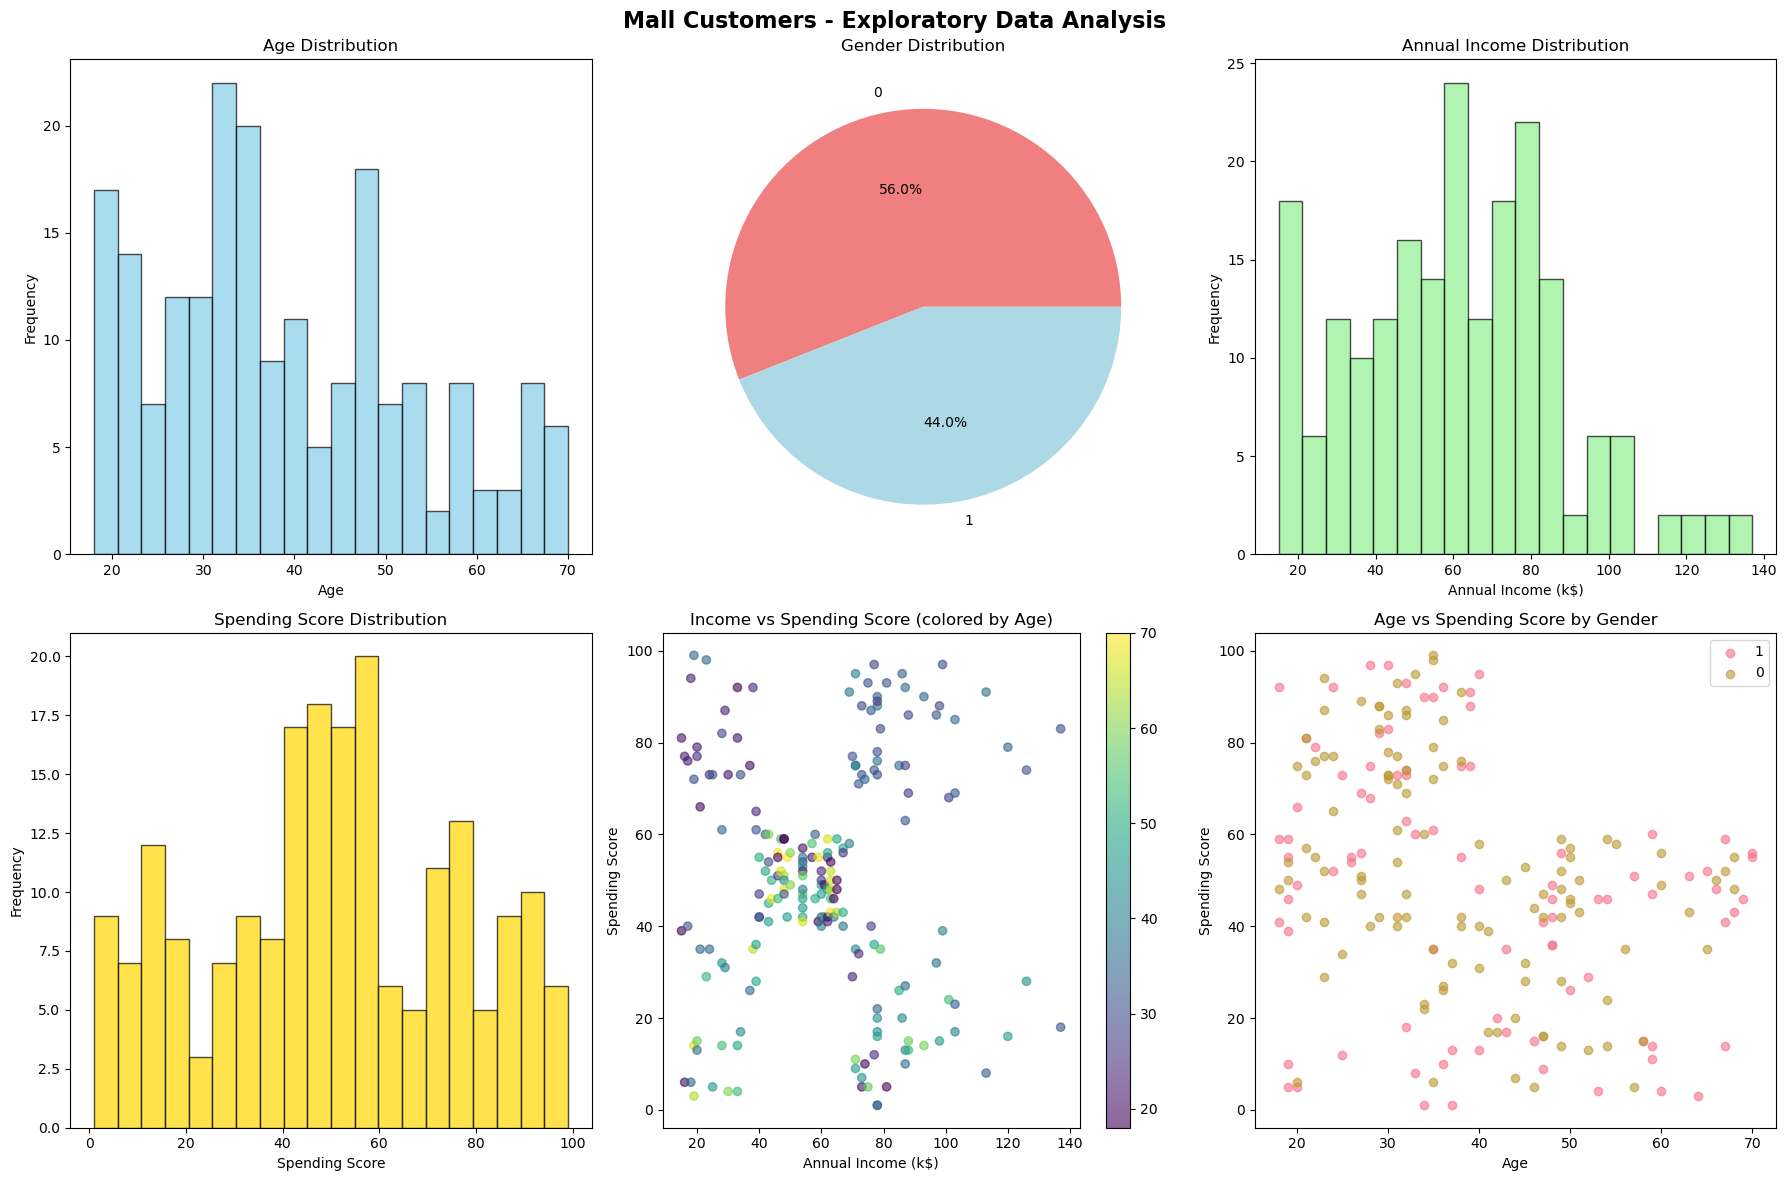

In [63]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Mall Customers - Exploratory Data Analysis', fontsize=16, fontweight='bold')

# Age Distribution
axes[0,0].hist(df['Age'], bins=20, color='skyblue', alpha=0.7, edgecolor='black')
axes[0,0].set_title('Age Distribution')
axes[0,0].set_xlabel('Age')
axes[0,0].set_ylabel('Frequency')

# Gender Distribution
gender_counts = df['Gender'].value_counts()
axes[0,1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', 
              colors=['lightcoral', 'lightblue'])
axes[0,1].set_title('Gender Distribution')

# Annual Income Distribution
axes[0,2].hist(df['Annual Income (k$)'], bins=20, color='lightgreen', alpha=0.7, edgecolor='black')
axes[0,2].set_title('Annual Income Distribution')
axes[0,2].set_xlabel('Annual Income (k$)')
axes[0,2].set_ylabel('Frequency')

# Spending Score Distribution
axes[1,0].hist(df['Spending Score (1-100)'], bins=20, color='gold', alpha=0.7, edgecolor='black')
axes[1,0].set_title('Spending Score Distribution')
axes[1,0].set_xlabel('Spending Score')
axes[1,0].set_ylabel('Frequency')

# Income vs Spending Score
scatter = axes[1,1].scatter(df['Annual Income (k$)'], df['Spending Score (1-100)'], 
                           c=df['Age'], cmap='viridis', alpha=0.6)
axes[1,1].set_title('Income vs Spending Score (colored by Age)')
axes[1,1].set_xlabel('Annual Income (k$)')
axes[1,1].set_ylabel('Spending Score')
plt.colorbar(scatter, ax=axes[1,1])

# Age vs Spending Score by Gender
for gender in df['Gender'].unique():
    gender_data = df[df['Gender'] == gender]
    axes[1,2].scatter(gender_data['Age'], gender_data['Spending Score (1-100)'], 
                     label=gender, alpha=0.6)
axes[1,2].set_title('Age vs Spending Score by Gender')
axes[1,2].set_xlabel('Age')
axes[1,2].set_ylabel('Spending Score')
axes[1,2].legend()

plt.tight_layout()
plt.show()

In [73]:
#Analysis by pairplot
# sns.pairplot(df[['Age', 'Annual Income (k$)']])
# plt.suptitle("Pairwise Feature Distribution", y=1.02)
# plt.show()

# # Optional: Heatmap of Correlation
# plt.figure(figsize=(8, 5))
# sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
# plt.title("Correlation Heatmap")
# plt.show()

determining optimal number of clusters

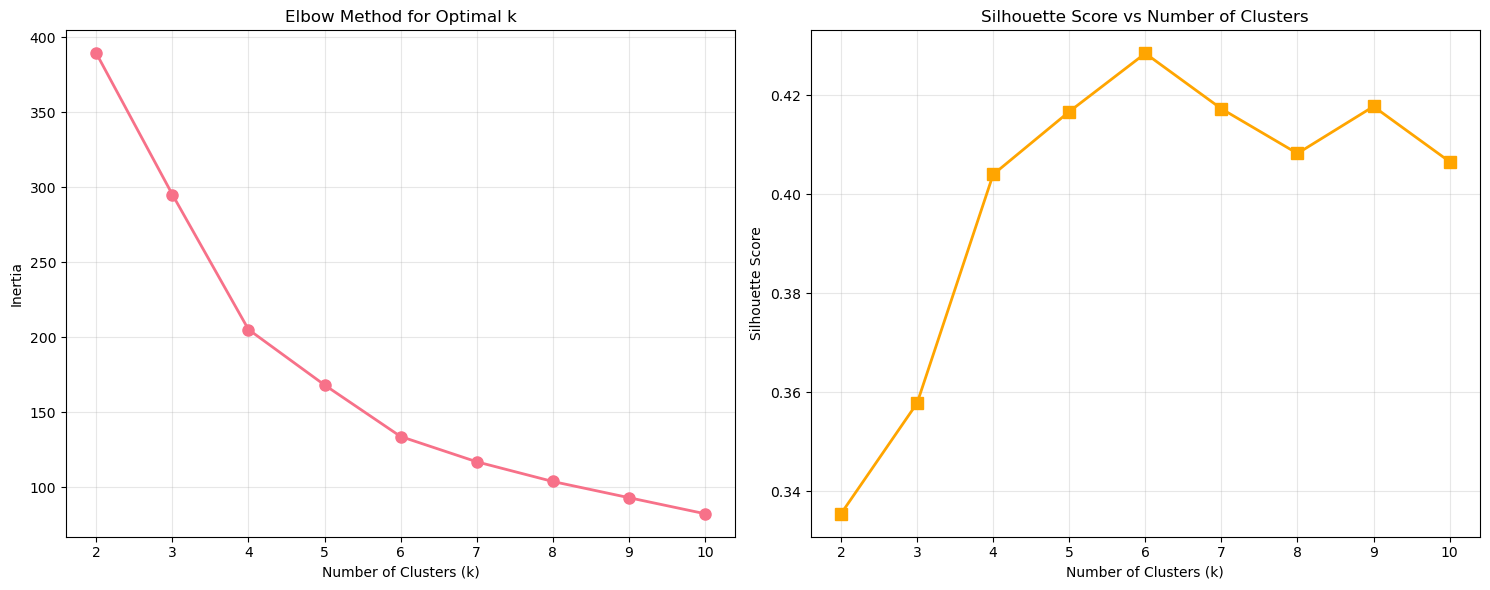

Silhouette Scores for different k values:
k=2: 0.335
k=3: 0.358
k=4: 0.404
k=5: 0.417
k=6: 0.428
k=7: 0.417
k=8: 0.408
k=9: 0.418
k=10: 0.407


In [15]:
inertias = []
silhouette_scores = []
K_range = range(2, 11)

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X_scaled, kmeans.labels_))

# Plot Elbow Method and Silhouette Analysis
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Elbow Method Plot
ax1.plot(K_range, inertias, marker='o', linewidth=2, markersize=8)
ax1.set_title('Elbow Method for Optimal k')
ax1.set_xlabel('Number of Clusters (k)')
ax1.set_ylabel('Inertia')
ax1.grid(True, alpha=0.3)

# Silhouette Score Plot
ax2.plot(K_range, silhouette_scores, marker='s', linewidth=2, markersize=8, color='orange')
ax2.set_title('Silhouette Score vs Number of Clusters')
ax2.set_xlabel('Number of Clusters (k)')
ax2.set_ylabel('Silhouette Score')
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# Print silhouette scores
print("Silhouette Scores for different k values:")
for k, score in zip(K_range, silhouette_scores):
    print(f"k={k}: {score:.3f}")


Final clustering

In [17]:
optimal_k = 5
kmeans_final = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels = kmeans_final.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = cluster_labels

print(f"\nFinal Clustering Results (k={optimal_k}):")
print(f"Silhouette Score: {silhouette_score(X_scaled, cluster_labels):.3f}")
print("\nCluster Distribution:")
print(df['Cluster'].value_counts().sort_index())


Final Clustering Results (k=5):
Silhouette Score: 0.417

Cluster Distribution:
Cluster
0    20
1    54
2    40
3    39
4    47
Name: count, dtype: int64


Cluster visualization

Centroids (Income, Spending Score):
Cluster 0: Income=$55.3k, Spending Score=49.5
Cluster 1: Income=$86.5k, Spending Score=82.1
Cluster 2: Income=$25.7k, Spending Score=79.4
Cluster 3: Income=$88.2k, Spending Score=17.1
Cluster 4: Income=$26.3k, Spending Score=20.9


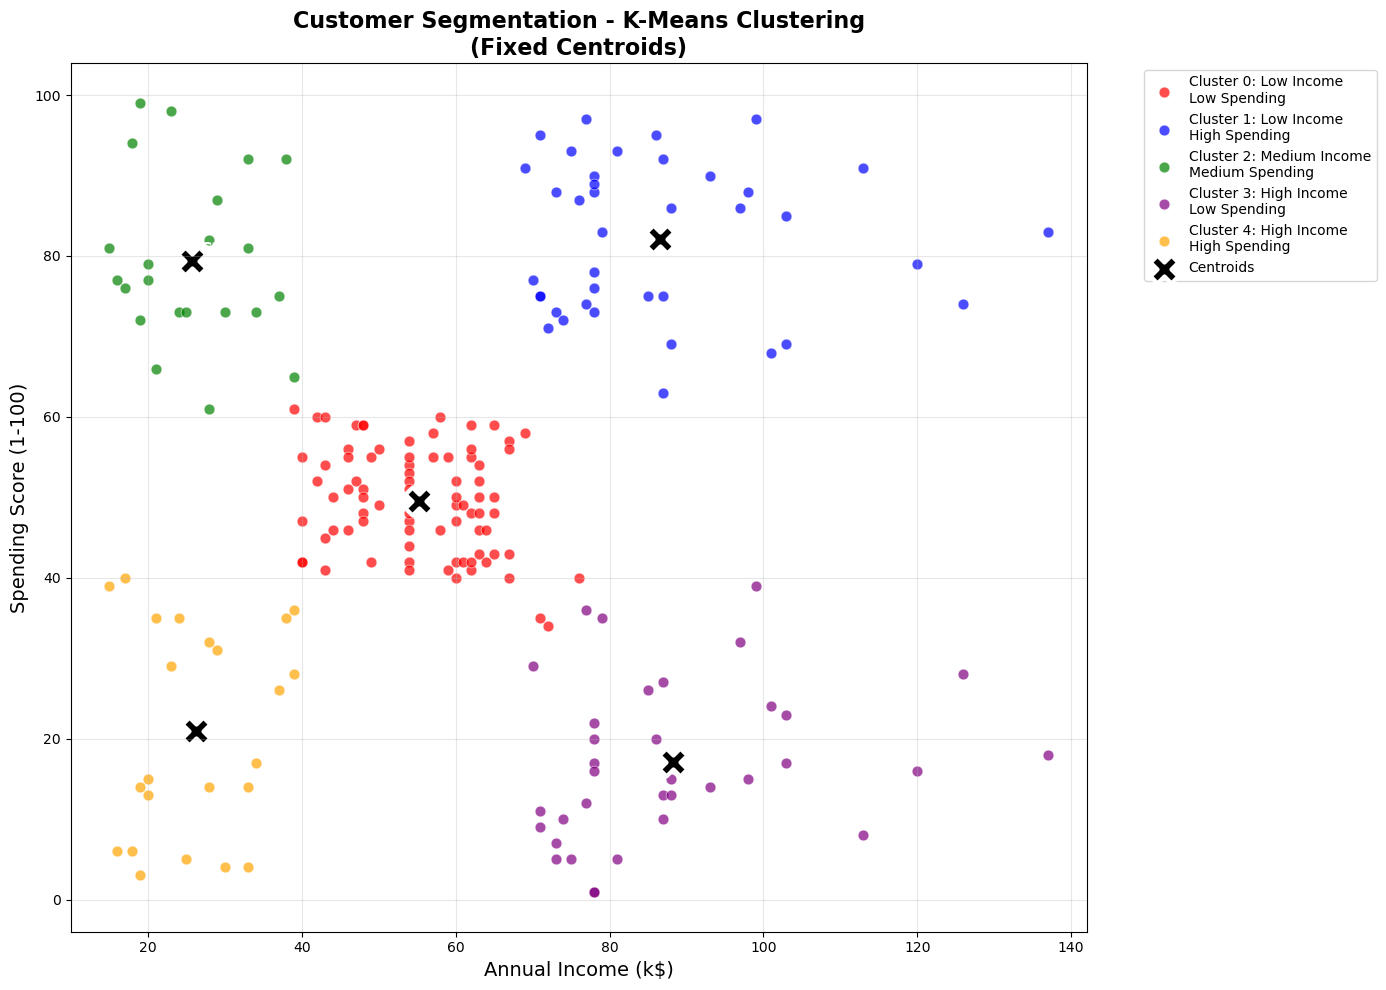


Silhouette Score (original data): 0.554


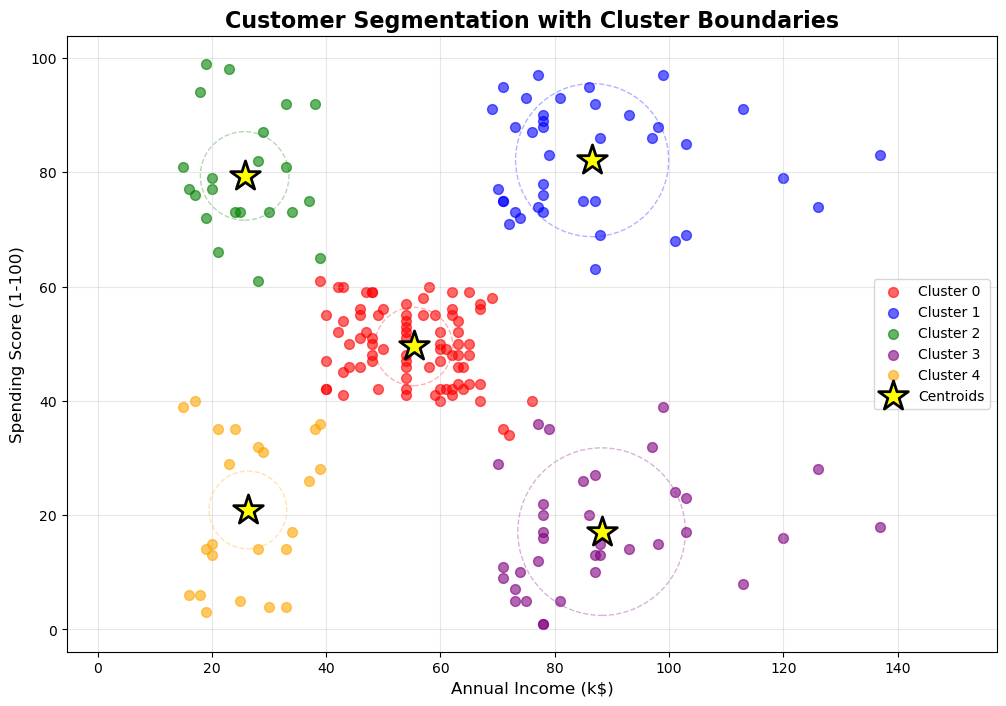

In [19]:
X_original = df[['Annual Income (k$)', 'Spending Score (1-100)']].values

# Apply K-means on original data
kmeans_viz = KMeans(n_clusters=optimal_k, random_state=42, n_init=10)
cluster_labels_viz = kmeans_viz.fit_predict(X_original)

# Update cluster labels in dataframe
df['Cluster'] = cluster_labels_viz

# Get centroids from the model fitted on original data
centroids_original = kmeans_viz.cluster_centers_

print(f"Centroids (Income, Spending Score):")
for i, centroid in enumerate(centroids_original):
    print(f"Cluster {i}: Income=${centroid[0]:.1f}k, Spending Score={centroid[1]:.1f}")

plt.figure(figsize=(14, 10))

# Create scatter plot with cluster colors
colors = ['red', 'blue', 'green', 'purple', 'orange', 'brown', 'pink']
cluster_names = ['Low Income\nLow Spending', 'Low Income\nHigh Spending', 
                'Medium Income\nMedium Spending', 'High Income\nLow Spending', 
                'High Income\nHigh Spending']

for i in range(optimal_k):
    cluster_points = df[df['Cluster'] == i]
    plt.scatter(cluster_points['Annual Income (k$)'], 
               cluster_points['Spending Score (1-100)'], 
               c=colors[i], label=f'Cluster {i}: {cluster_names[i] if i < len(cluster_names) else f"Cluster {i}"}', 
               alpha=0.7, s=60, edgecolors='white', linewidth=0.5)

# Plot centroids with proper positioning
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], 
           marker='X', s=400, linewidths=3, color='black', 
           label='Centroids', edgecolors='white')

# Add centroid labels
for i, centroid in enumerate(centroids_original):
    plt.annotate(f'C{i}', (centroid[0], centroid[1]), 
                xytext=(5, 5), textcoords='offset points',
                fontsize=12, fontweight='bold', color='white')

plt.title('Customer Segmentation - K-Means Clustering\n(Fixed Centroids)', 
          fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=14)
plt.ylabel('Spending Score (1-100)', fontsize=14)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)

# Add some styling
plt.xlim(df['Annual Income (k$)'].min() - 5, df['Annual Income (k$)'].max() + 5)
plt.ylim(df['Spending Score (1-100)'].min() - 5, df['Spending Score (1-100)'].max() + 5)

plt.tight_layout()
plt.show()

# Verify cluster quality with silhouette score
silhouette_original = silhouette_score(X_original, cluster_labels_viz)
print(f"\nSilhouette Score (original data): {silhouette_original:.3f}")

# Alternative visualization with different approach
plt.figure(figsize=(12, 8))

# Create a more detailed visualization
for i in range(optimal_k):
    cluster_points = df[df['Cluster'] == i]
    plt.scatter(cluster_points['Annual Income (k$)'], 
               cluster_points['Spending Score (1-100)'], 
               c=colors[i], label=f'Cluster {i}', alpha=0.6, s=50)

# Plot centroids as stars
plt.scatter(centroids_original[:, 0], centroids_original[:, 1], 
           marker='*', s=500, color='yellow', edgecolors='black', 
           linewidth=2, label='Centroids', zorder=10)

# Draw circles around centroids to show cluster boundaries (approximate)
for i, centroid in enumerate(centroids_original):
    cluster_points = df[df['Cluster'] == i]
    # Calculate approximate radius as 1.5 * std of distances from centroid
    distances = np.sqrt((cluster_points['Annual Income (k$)'] - centroid[0])**2 + 
                       (cluster_points['Spending Score (1-100)'] - centroid[1])**2)
    radius = 1.5 * distances.std() if len(distances) > 1 else 10
    
    circle = plt.Circle((centroid[0], centroid[1]), radius, 
                       color=colors[i], fill=False, linestyle='--', alpha=0.3)
    plt.gca().add_patch(circle)

plt.title('Customer Segmentation with Cluster Boundaries', fontsize=16, fontweight='bold')
plt.xlabel('Annual Income (k$)', fontsize=12)
plt.ylabel('Spending Score (1-100)', fontsize=12)
plt.legend()
plt.grid(True, alpha=0.3)
plt.axis('equal')
plt.show()

Cluster Analysis And Profiling

In [21]:
print("\n" + "="*50)
print("DETAILED CLUSTER ANALYSIS")
print("="*50)

cluster_summary = df.groupby('Cluster').agg({
    'Age': ['mean', 'std'],
    'Annual Income (k$)': ['mean', 'std'],
    'Spending Score (1-100)': ['mean', 'std'],
    'CustomerID': 'count'
}).round(2)

cluster_summary.columns = ['Age_Mean', 'Age_Std', 'Income_Mean', 'Income_Std', 
                          'Spending_Mean', 'Spending_Std', 'Count']

print("Cluster Summary Statistics:")
print(cluster_summary)

# Create cluster profiles with business interpretation
cluster_profiles = {
    0: "Careful Customers (Low Income, Low Spending)",
    1: "Standard Customers (Medium Income, Medium Spending)", 
    2: "Target Customers (Medium Income, High Spending)",
    3: "Careless Customers (High Income, Low Spending)",
    4: "Sensible Customers (High Income, High Spending)"
}

print("\n" + "="*50)
print("BUSINESS INTERPRETATION OF CLUSTERS")
print("="*50)

for cluster_id in range(optimal_k):
    cluster_data = df[df['Cluster'] == cluster_id]
    
    print(f"\nCluster {cluster_id}: {cluster_profiles.get(cluster_id, 'Unknown Profile')}")
    print(f"Size: {len(cluster_data)} customers ({len(cluster_data)/len(df)*100:.1f}%)")
    print(f"Average Age: {cluster_data['Age'].mean():.1f} years")
    print(f"Average Income: ${cluster_data['Annual Income (k$)'].mean():.1f}k")
    print(f"Average Spending Score: {cluster_data['Spending Score (1-100)'].mean():.1f}/100")
    
    # Gender distribution within cluster
    gender_dist = cluster_data['Gender'].value_counts()
    print(f"Gender Distribution: {dict(gender_dist)}")



DETAILED CLUSTER ANALYSIS
Cluster Summary Statistics:
         Age_Mean  Age_Std  Income_Mean  Income_Std  Spending_Mean  \
Cluster                                                              
0           42.72    16.45        55.30        8.99          49.52   
1           32.69     3.73        86.54       16.31          82.13   
2           25.27     5.26        25.73        7.57          79.36   
3           41.11    11.34        88.20       16.40          17.11   
4           45.22    13.23        26.30        7.89          20.91   

         Spending_Std  Count  
Cluster                       
0                6.53     81  
1                9.36     39  
2               10.50     22  
3                9.95     35  
4               13.02     23  

BUSINESS INTERPRETATION OF CLUSTERS

Cluster 0: Careful Customers (Low Income, Low Spending)
Size: 81 customers (40.5%)
Average Age: 42.7 years
Average Income: $55.3k
Average Spending Score: 49.5/100
Gender Distribution: {0: 48, 1: 33}


Advanced Visualization

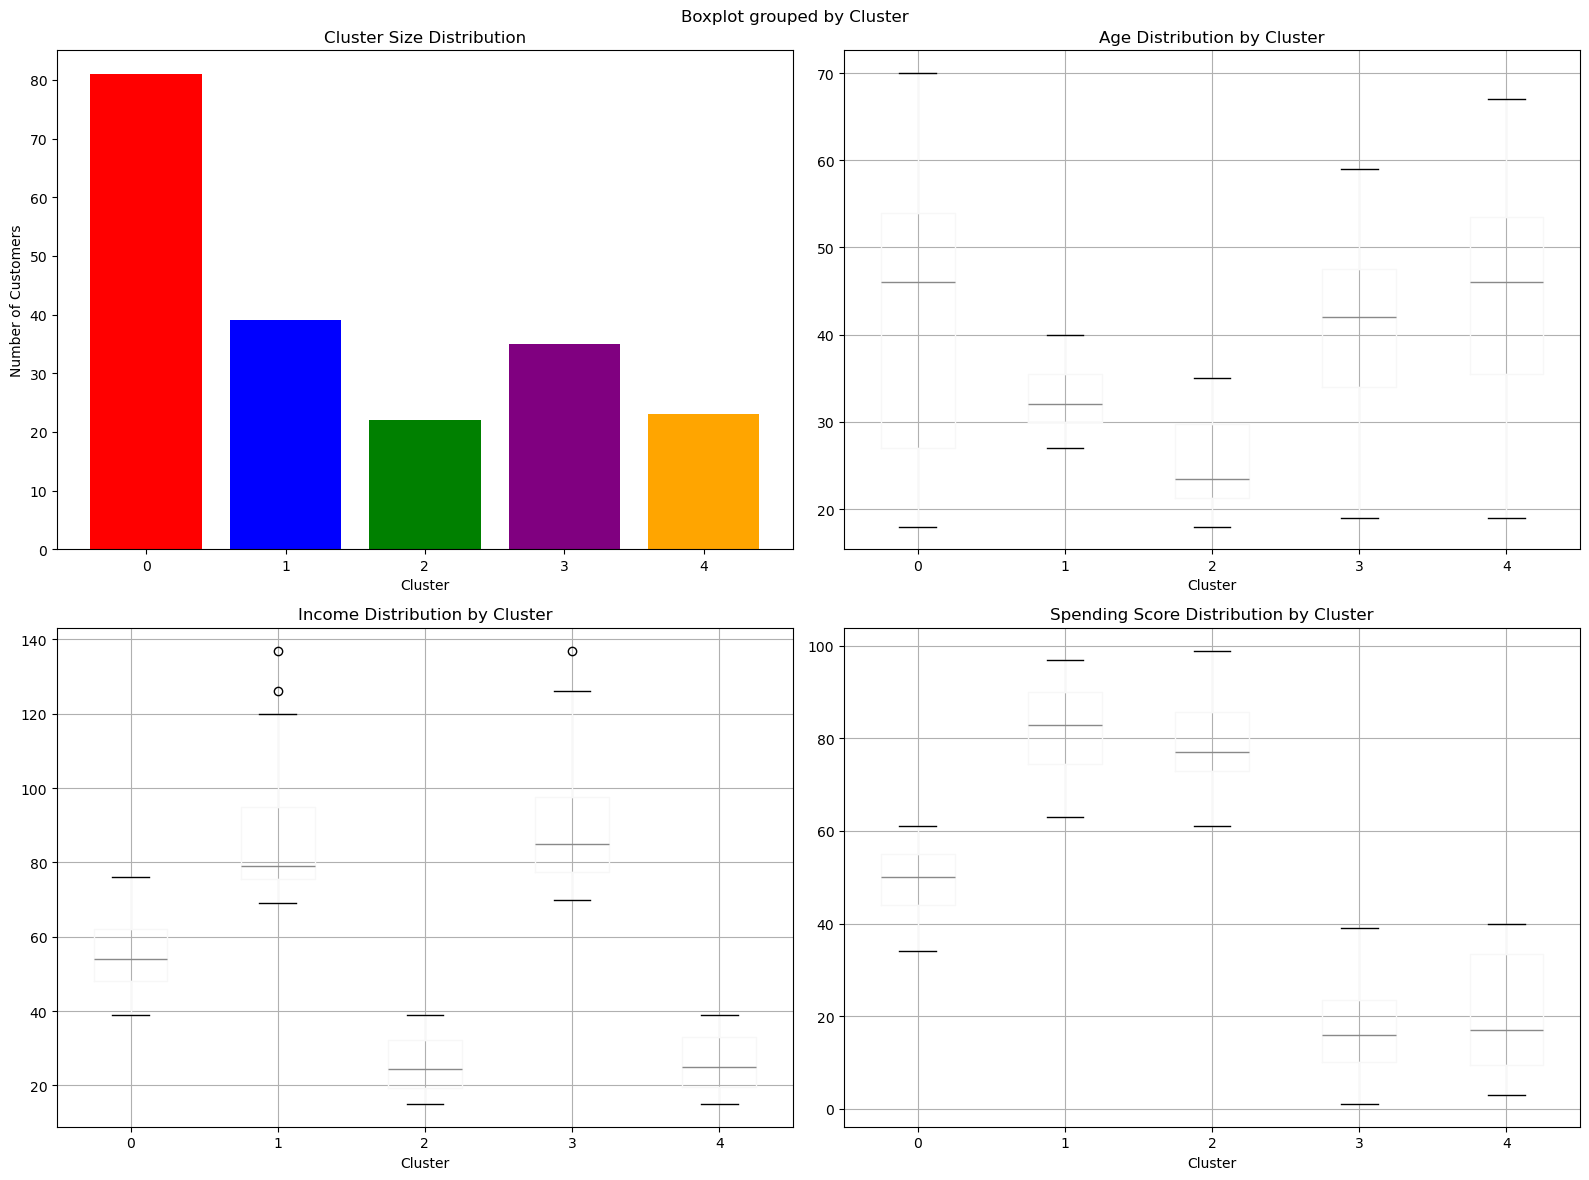

In [27]:
fig, axes = plt.subplots(2, 2, figsize=(16, 12))
fig.suptitle('Customer Segmentation Dashboard', fontsize=16, fontweight='bold')

# Cluster size distribution
cluster_counts = df['Cluster'].value_counts().sort_index()
axes[0,0].bar(range(len(cluster_counts)), cluster_counts.values, color=colors[:len(cluster_counts)])
axes[0,0].set_title('Cluster Size Distribution')
axes[0,0].set_xlabel('Cluster')
axes[0,0].set_ylabel('Number of Customers')
axes[0,0].set_xticks(range(len(cluster_counts)))

# Age distribution by cluster
df.boxplot(column='Age', by='Cluster', ax=axes[0,1])
axes[0,1].set_title('Age Distribution by Cluster')
axes[0,1].set_xlabel('Cluster')

# Income distribution by cluster  
df.boxplot(column='Annual Income (k$)', by='Cluster', ax=axes[1,0])
axes[1,0].set_title('Income Distribution by Cluster')
axes[1,0].set_xlabel('Cluster')

# Spending distribution by cluster
df.boxplot(column='Spending Score (1-100)', by='Cluster', ax=axes[1,1])
axes[1,1].set_title('Spending Score Distribution by Cluster')
axes[1,1].set_xlabel('Cluster')

plt.tight_layout()
plt.show()

Business Recommendation

In [30]:
print("\n" + "="*60)
print("ACTIONABLE BUSINESS RECOMMENDATIONS")
print("="*60)

recommendations = {
    "High Value Clusters (Target for Premium Services)": [
        "Cluster 4: Sensible Customers - Offer premium products and exclusive services",
        "Cluster 2: Target Customers - Focus marketing efforts here for maximum ROI"
    ],
    "Growth Opportunity Clusters": [
        "Cluster 3: Careless Customers - Implement loyalty programs to increase spending",
        "Cluster 1: Standard Customers - Offer targeted promotions to increase engagement"
    ],
    "Retention Focus": [
        "Cluster 0: Careful Customers - Provide value-based offerings and discounts"
    ]
}

for category, recs in recommendations.items():
    print(f"\n{category}:")
    for rec in recs:
        print(f"  • {rec}")



ACTIONABLE BUSINESS RECOMMENDATIONS

High Value Clusters (Target for Premium Services):
  • Cluster 4: Sensible Customers - Offer premium products and exclusive services
  • Cluster 2: Target Customers - Focus marketing efforts here for maximum ROI

Growth Opportunity Clusters:
  • Cluster 3: Careless Customers - Implement loyalty programs to increase spending
  • Cluster 1: Standard Customers - Offer targeted promotions to increase engagement

Retention Focus:
  • Cluster 0: Careful Customers - Provide value-based offerings and discounts


Saving Results

In [49]:
df.to_csv('mall_customers_clustered.csv', index=False)
print(f"\nResults saved to 'mall_customers_clustered.csv'")

# Create a summary report
summary_stats = {
    'Total Customers': len(df),
    'Number of Clusters': optimal_k,
    'Silhouette Score': round(silhouette_score(X_scaled, cluster_labels), 3),
    'Average Age': round(df['Age'].mean(), 1),
    'Average Income': round(df['Annual Income (k$)'].mean(), 1),
    'Average Spending Score': round(df['Spending Score (1-100)'].mean(), 1)
}

print("\nProject Summary:")
print("-" * 30)
for key, value in summary_stats.items():
    print(f"{key}: {value}")




Results saved to 'mall_customers_clustered.csv'

Project Summary:
------------------------------
Total Customers: 200
Number of Clusters: 5
Silhouette Score: 0.417
Average Age: 38.8
Average Income: 60.6
Average Spending Score: 50.2
